In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Arpan Jain
arpan.2226cs1042@kiet.edu
Data Loading and Cleaning: Load the retail sales dataset.

In [6]:
d = pd.read_csv("retail_sales_dataset.csv")
df = pd.DataFrame(d)
print("Data has been imported")
df.head()

Data has been imported


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [28]:
df.isnull().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [29]:
df.dropna(inplace=True) 

In [9]:
print("Total sales : {}".format(df["Quantity"].sum()))
print("Total profit : {}".format(df["Total Amount"].sum()))

Total sales : 2514
Total profit : 456000


In [10]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [30]:
df.duplicated().sum()

0

In [12]:
#DESCRIPTIVE STATISTICS:

In [13]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [32]:
descriptive_stats = df.describe()
mode = df.mode().iloc[0]

# Display the statistics
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
        Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [33]:
print("Mode:\n", mode)

Mode:
 Transaction ID               1
Date                2023-05-16
Customer ID            CUST001
Gender                  Female
Age                       43.0
Product Category      Clothing
Quantity                   4.0
Price per Unit            50.0
Total Amount              50.0
Name: 0, dtype: object


In [34]:
#Time Series Analysis

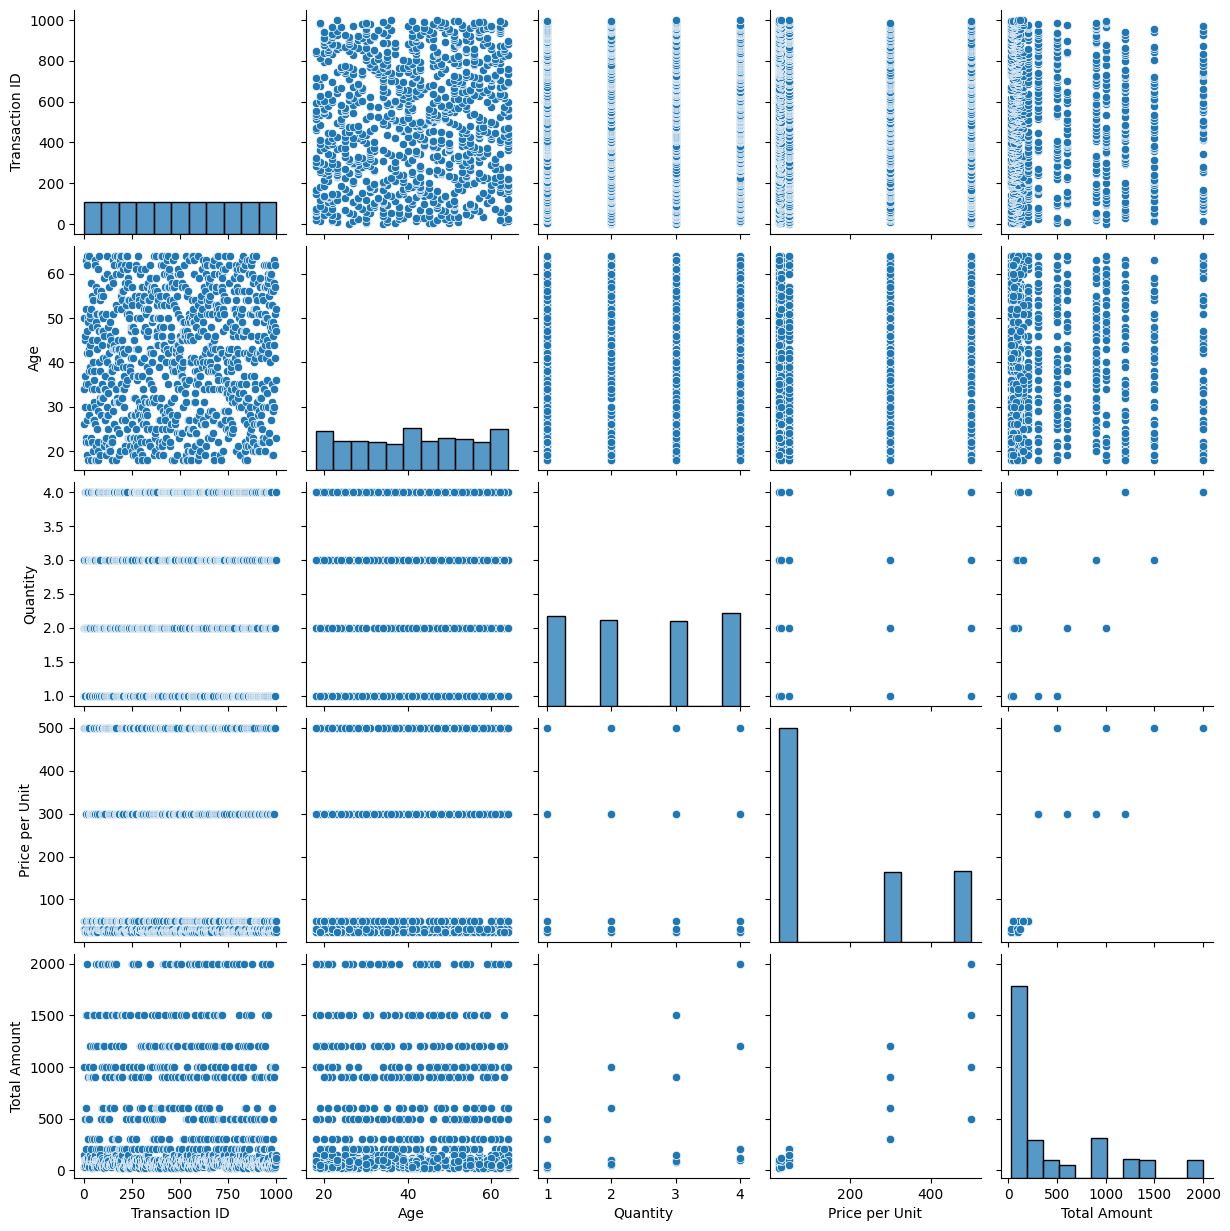

In [15]:
sns.pairplot(df)

In [35]:
#CUSTOMER AND PRODUCT ANALYSIS WITH VISUALIZATION

In [17]:
df["Product Category"].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

<Axes: xlabel='Product Category', ylabel='count'>

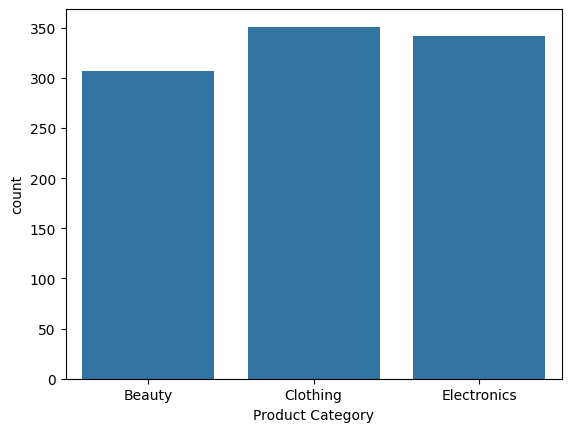

In [18]:
sns.countplot(x=df["Product Category"])

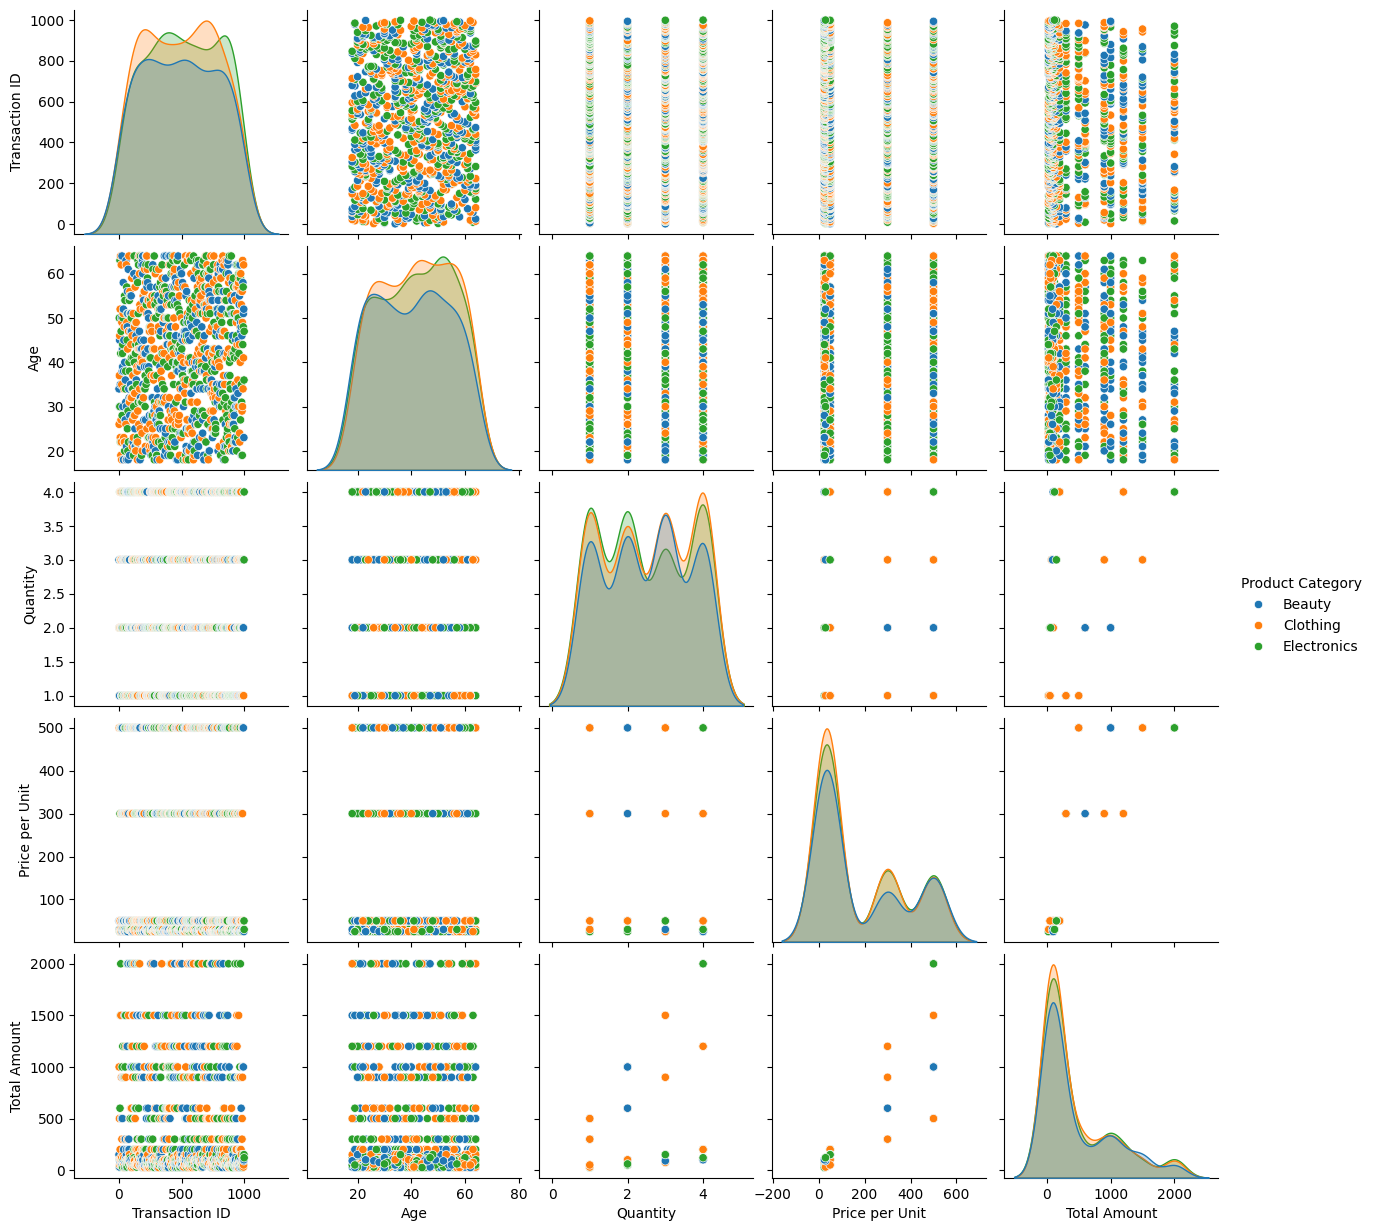

In [19]:
sns.pairplot(df, hue="Product Category")

In [20]:
p = df.groupby("Product Category")[["Quantity","Total Amount"]].sum()
p

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


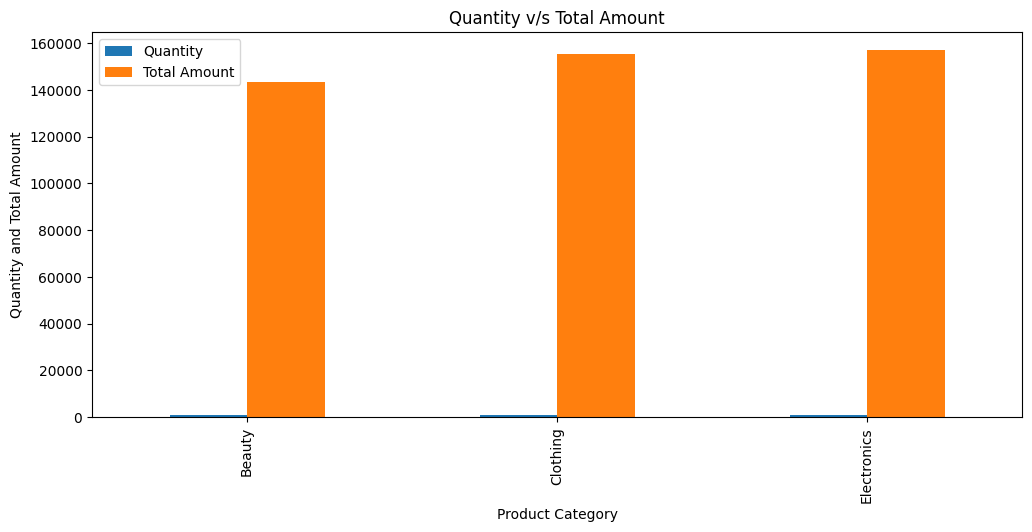

In [21]:
p.plot(kind="bar", figsize=(12,5))
plt.title("Quantity v/s Total Amount")
plt.ylabel("Quantity and Total Amount")
plt.show()

In [22]:
cate=df["Product Category"].value_counts()

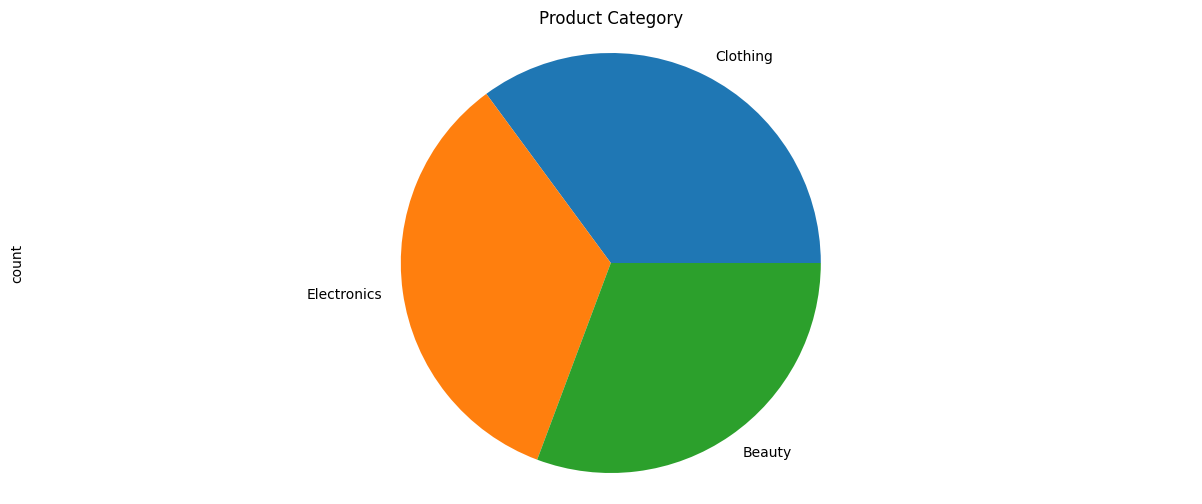

In [23]:
explode_list=[0,0.1,0.1]
color_list=["Red","Blue","Seagreen"]
cate.plot(kind="pie", figsize=(15,6))
plt.title("Product Category")
plt.axis("equal")
plt.show()

In [24]:
gen=df["Gender"].value_counts()
gen

Gender
Female    510
Male      490
Name: count, dtype: int64

Coral = Female, Blue = Male


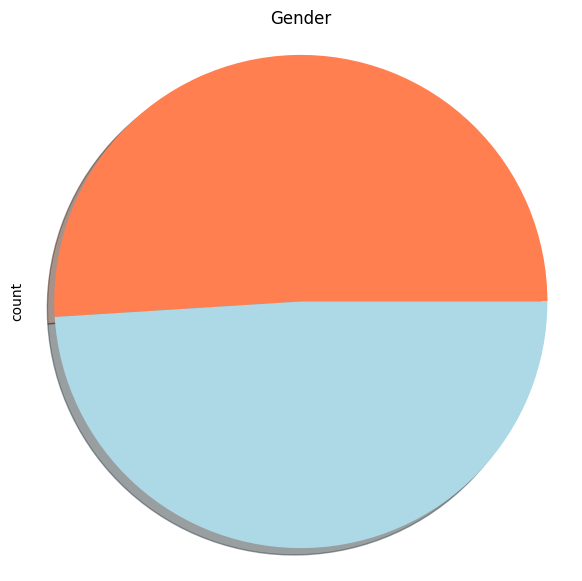

In [25]:
gen.plot(kind="pie", figsize=(7,7),shadow=True, labels=None, colors=["coral","lightblue"])
print("Coral = Female, Blue = Male")
plt.title("Gender")
plt.axis("equal")
plt.show()

In [26]:
df["Price per Unit"].corr(df["Total Amount"])

0.8519248403554038

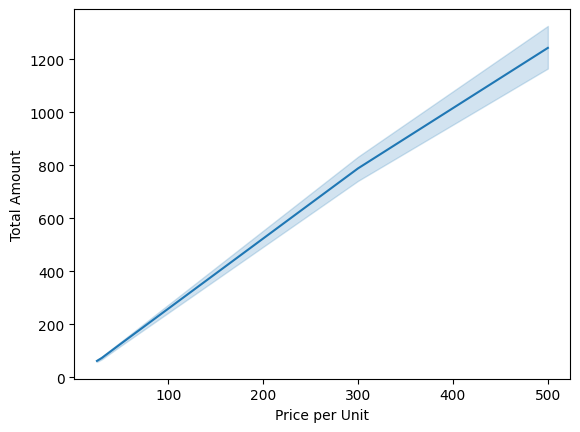

In [27]:
sns.lineplot(x="Price per Unit", y="Total Amount", data=df)
plt.show()